# Feature Maps

[link](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)

In [20]:
# load vgg model
from keras.applications.resnet import ResNet50
# load the model
model = ResNet50()
# summarize the model
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [21]:
# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]
	# check for convolutional layer
	if '_conv' not in layer.name:
		continue
	# summarize output shape
	print(i, layer.name, layer.output.shape)

2 conv1_conv (None, 112, 112, 64)
7 conv2_block1_1_conv (None, 56, 56, 64)
10 conv2_block1_2_conv (None, 56, 56, 64)
13 conv2_block1_0_conv (None, 56, 56, 256)
14 conv2_block1_3_conv (None, 56, 56, 256)
19 conv2_block2_1_conv (None, 56, 56, 64)
22 conv2_block2_2_conv (None, 56, 56, 64)
25 conv2_block2_3_conv (None, 56, 56, 256)
29 conv2_block3_1_conv (None, 56, 56, 64)
32 conv2_block3_2_conv (None, 56, 56, 64)
35 conv2_block3_3_conv (None, 56, 56, 256)
39 conv3_block1_1_conv (None, 28, 28, 128)
42 conv3_block1_2_conv (None, 28, 28, 128)
45 conv3_block1_0_conv (None, 28, 28, 512)
46 conv3_block1_3_conv (None, 28, 28, 512)
51 conv3_block2_1_conv (None, 28, 28, 128)
54 conv3_block2_2_conv (None, 28, 28, 128)
57 conv3_block2_3_conv (None, 28, 28, 512)
61 conv3_block3_1_conv (None, 28, 28, 128)
64 conv3_block3_2_conv (None, 28, 28, 128)
67 conv3_block3_3_conv (None, 28, 28, 512)
71 conv3_block4_1_conv (None, 28, 28, 128)
74 conv3_block4_2_conv (None, 28, 28, 128)
77 conv3_block4_3_conv (Non

<class 'keras.engine.training.Model'>


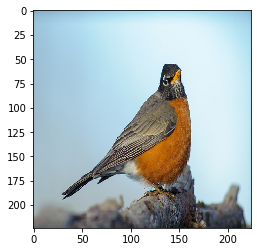

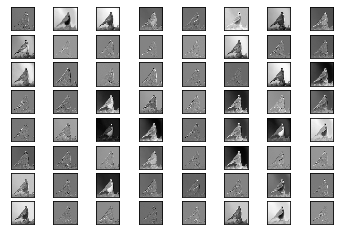

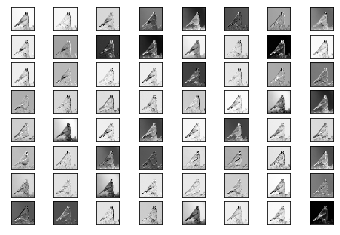

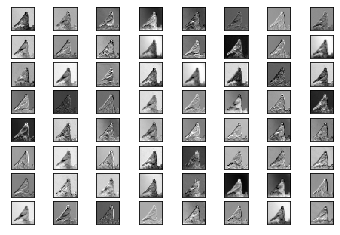

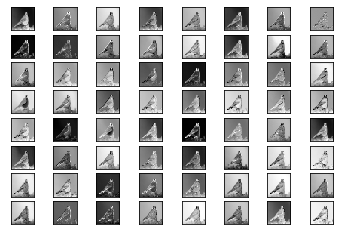

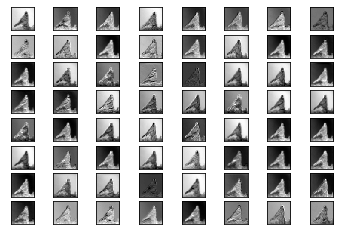

In [34]:
# visualize feature maps output from each block in the vgg model
from keras.applications.resnet import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# redefine model to output right after the first hidden layer
ixs = [2, 7, 10, 13, 14]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
print(type(model))
# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))
pyplot.imshow(img)
pyplot.show()
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

Dla dwóch ostatnich istnieje 256 feature maps ale skupiliśmy się na 64